### Streaming Data Visualisation

In [2]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import ast
import pandas as pd
from pprint import pprint

ModuleNotFoundError: No module named 'kafka'

In [4]:
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

## Establishing a connection between consumer and the streaming engine

In [ ]:
def connect_kafka_consumer():
    _consumer = None
    try:
#         can have just one topic
         _consumer = KafkaConsumer('Producer',
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['127.0.0.1:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

## Defining a line graph for plotting air temperature against arrival time for climate data

In [ ]:
def init_plots():
    try:  
#          ax.text method takes an x position, a y position, a string, 
# and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Arrival Time')
        ax.set_ylabel('Air Tempertature')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

In [ ]:
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            rddStrings = (message.value.decode('utf-8'))
            rddData= ast.literal_eval(rddStrings)
            for key in rddData:
                if key == 'air_temperature_celcius':
                    x.append(str(rddData['Created_Time'].split(".")[0].split(" ")[1]))
                    y.append(float(rddData['air_temperature_celcius']))

            # we start plotting only when we have 5 data points
            if len(y) > 5:
#               finding the max of x
                yMax = max(y)
                yMin = min(y)
                
                maxPosition = y.index(max(y))
                minPosition = y.index(min(y))                 
                
                
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Arrival Time')
                ax.set_ylabel('Air Temperature')
                ax.set_ylim(0,50) 
                ax.set_yticks([0,5,10,15,20,25,30,35,40,45,50])
                
                #Adding labels for Max and Min Values
                ax.annotate('Max Value',
            xy=(x[maxPosition], yMax), xycoords='data',
            xytext=(x[maxPosition],yMax + 1), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
                
                ax.annotate('Min Value',
            xy=(x[minPosition], yMin), xycoords='data',
            xytext=(x[minPosition],yMin + 1), textcoords='offset points',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
                
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
        print(rddData)
        print(x)
        print(y)

In [ ]:
consumer = connect_kafka_consumer()
print(consumer)
fig, ax = init_plots()
consume_messages(consumer, fig, ax)

## Static Data Visualisation

### Records with top 10 number of fires

In [5]:
from collections import Counter
from pymongo import MongoClient

In [23]:
client = MongoClient()
db = client.fit5148_db
# Preparing the data for plotting
topTenFires = []
results = db.hotspot_historic.find({})
countDict = {}
for result in results:
    datetimekey = result['Datetime'][0:16]
    if datetimekey in countDict.keys():
        count = countDict[datetimekey]
        count += 1
        countDict[datetimekey] = count
    else:
        countDict[datetimekey] = 1

c = Counter(countDict)
top_ten = c.most_common(10)
print(top_ten)
print(countDict)

[('2019-05-24 22:31', 7), ('2019-05-24 22:26', 7), ('2019-05-24 22:03', 7), ('2019-05-24 22:24', 6), ('2019-05-24 22:20', 6), ('2019-05-24 22:28', 6), ('2019-05-24 22:05', 6), ('2019-05-24 22:09', 6), ('2019-05-24 22:32', 6), ('2019-05-24 22:06', 6)]
{'2019-05-24 22:24': 6, '2019-05-24 22:17': 3, '2019-05-24 22:01': 3, '2019-05-24 22:10': 3, '2019-05-24 22:20': 6, '2019-05-24 22:28': 6, '2019-05-24 22:00': 5, '2019-05-24 22:08': 4, '2019-05-24 22:07': 6, '2019-05-24 22:25': 4, '2019-05-24 22:13': 5, '2019-05-24 22:18': 6, '2019-05-24 22:33': 4, '2019-05-24 22:29': 5, '2019-05-24 22:16': 3, '2019-05-24 22:35': 1, '2019-05-24 22:34': 4, '2019-05-24 22:21': 4, '2019-05-24 22:22': 4, '2019-05-24 22:31': 7, '2019-05-24 22:02': 4, '2019-05-24 22:26': 7, '2019-05-24 22:04': 4, '2019-05-24 22:32': 6, '2019-05-24 22:11': 4, '2019-05-24 22:05': 6, '2019-05-24 21:59': 5, '2019-05-24 22:30': 4, '2019-05-24 22:19': 3, '2019-05-24 22:12': 5, '2019-05-24 22:14': 5, '2019-05-24 22:03': 7, '2019-05-24 

<IPython.core.display.Javascript object>


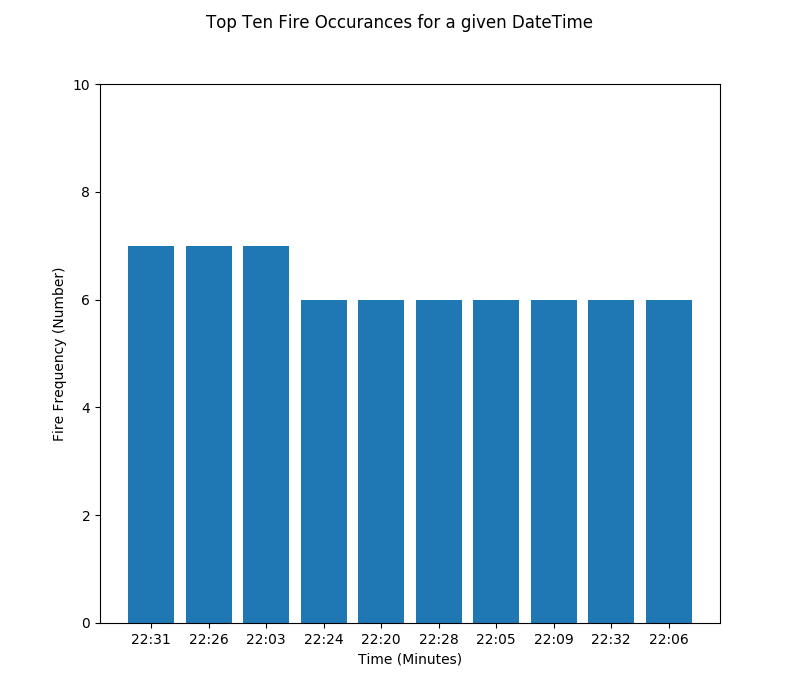

In [26]:
#x axis
datetimeOfFire=[]    
# y axis
frequency=[]

for record in top_ten:
    datetime=str(record[0]).split(" ")[1]
    datetimeOfFire.append(datetime)
    frequency.append(int(record[1]))


width = 8
height = 7
fig = plt.figure(figsize=(width,height))
# adding the subplot axes to the given grid position
ax = fig.add_subplot(111) 
ax.set_xlabel('Time (Minutes)')
ax.set_ylabel('Fire Frequency (Number)')
fig.suptitle('Top Ten Fire Occurances for a given DateTime') 
plt.bar(datetimeOfFire,frequency)
ax.set_ylim(0,10) 
ax.set_yticks([0,2,4,6,8,10])
fig.show() # displaying the figure
fig.canvas.draw()


## Marking Fire locations on map

In [ ]:
!pip3 install gmplot

In [8]:
import gmplot

# Google’s geocoding service enabling map initilization to the location of your choice.
gmap = gmplot.GoogleMapPlotter(-37.812015244225677, 144.951471202974, 15) # latitude and longitude of melbourne city

In [22]:
client = MongoClient()
db = client.fit5148_db

# Preparing the data for marking
topTenFires = []

#find the top ten fires by grouping 
results = db.hotspot_historic.aggregate([
{
    "$sort" : { 
        "Surface_Temperature_Celcius" : -1
    }
},
{
    "$limit" : 10
},
{
    "$lookup":
    {
        "from": "climate_historic",
        "localField": "Date",
        "foreignField" : "Date",
        "as": "climate_data"
    }
}])

for result in results:
    pprint(result)

{'Date': datetime.datetime(2019, 5, 24, 0, 0),
 'Datetime': '2019-05-24 22:00:45',
 'Sender_ID': 'Producer02',
 '_id': ObjectId('5ce7dcf29343690fc5c071a1'),
 'climate_data': [{'Created_Time': '2019-05-24 21:59:16',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dc999343690fbfc07194'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.7084',
                   'longitude': '142.7354',
                   'max_wind_speed': '19',
                   'precipitation': '0.02G',
                   'relative_humidity': '44.1',
                   'windspeed_knots': '12.9'},
                  {'Created_Time': '2019-05-24 21:59:11',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dc999343690fc2c07194')],
                 

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd9c9343690fdec071af'),
                   'air_temperature_celcius': '13',
                   'latitude': '-37.0684',
                   'longitude': '141.0437',
                   'max_wind_speed': '13',
                   'precipitation': '0.12G',
                   'relative_humidity': '51.1',
                   'windspeed_knots': '6'},
                  {'Created_Time': '2019-05-24 22:03:47',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dda69343690fc5c071bb'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.485',
                   'longitude': '148.095',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00A',
 

                   'latitude': '-37.368',
                   'longitude': '148.05',
                   'max_wind_speed': '14',
                   'precipitation': '0.00I',
                   'relative_humidity': '41.4',
                   'windspeed_knots': '9.4'},
                  {'Created_Time': '2019-05-24 22:07:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de6e9343690fbfc071cd'),
                   'air_temperature_celcius': '23',
                   'latitude': '-37.213',
                   'longitude': '142.941',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '61.9',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 22:07:07',
                   'Date': datetime.datetime(2019

                   '_id': ObjectId('5ce7df7c9343690fc5c071ed'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.475',
                   'longitude': '148.134',
                   'max_wind_speed': '7',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.1',
                   'windspeed_knots': '3.4'},
                  {'Created_Time': '2019-05-24 22:11:32',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7df7c9343690fc5c071eb'),
                                  ObjectId('5ce7df7c9343690fc5c071ec')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df7c9343690fc5c071ee'),
                   'air_temperature_celcius': '10',
                   'latitude': '-37.327',
                   'longitude': '148.083',
                   'max_wind_speed': '14',
                   'preci

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0769343690fc5c07208'),
                   'air_temperature_celcius': '8',
                   'latitude': '-34.5374',
                   'longitude': '141.7141',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.01G',
                   'relative_humidity': '40.8',
                   'windspeed_knots': '5.5'},
                  {'Created_Time': '2019-05-24 22:15:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0809343690fbfc0720c'),
                   'air_temperature_celcius': '20',
                   'latitude': '-37.954',
                   'longitude': '143.918',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.01G'

                   'precipitation': '0.12G',
                   'relative_humidity': '54.6',
                   'windspeed_knots': '12'},
                  {'Created_Time': '2019-05-24 22:19:28',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1529343690fc2c07237'),
                   'air_temperature_celcius': '13',
                   'latitude': '-37.605',
                   'longitude': '149.308',
                   'max_wind_speed': '14',
                   'precipitation': '0.71G',
                   'relative_humidity': '48.5',
                   'windspeed_knots': '10.7'},
                  {'Created_Time': '2019-05-24 22:19:33',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e15c9343690fc2c07239')],
                   'Sender_ID': 'Produ

                   'Station': None,
                   '_id': ObjectId('5ce7e2569343690fc2c07259'),
                   'air_temperature_celcius': '19',
                   'latitude': '-36.837',
                   'longitude': '142.0391',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '55.8',
                   'windspeed_knots': '6'},
                  {'Created_Time': '2019-05-24 22:23:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2609343690fdec07232'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.375',
                   'longitude': '148.054',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '47',


                   'windspeed_knots': '7.3'},
                  {'Created_Time': '2019-05-24 22:27:29',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3329343690fc2c07273')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3329343690fc2c07274'),
                   'air_temperature_celcius': '16',
                   'latitude': '-37.95',
                   'longitude': '142.366',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '53.6',
                   'windspeed_knots': '8.1'},
                  {'Created_Time': '2019-05-24 22:27:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e33c934369

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e4229343690fdec07273'),
                   'air_temperature_celcius': '15',
                   'latitude': '-36.6833',
                   'longitude': '141.6347',
                   'max_wind_speed': '20',
                   'precipitation': '1.77G',
                   'relative_humidity': '56.2',
                   'windspeed_knots': '16.9'},
                  {'Created_Time': '2019-05-24 22:31:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e42c9343690fbfc0728c'),
                                  ObjectId('5ce7e42c9343690fbfc0728d')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e42c9343690fbfc0728e'),
                   'air_temperature_celcius': '12',
                   'latitude': '-35.953',
                   'long

                   'latitude': '-36.279',
                   'longitude': '141.6716',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '42.5',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 21:59:21',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dca29343690fbfc07197'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.764',
                   'longitude': '144.165',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '52.4',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 21:59:31',
                   'Date': datetime.datetime(20

                   'windspeed_knots': '8.7'},
                  {'Created_Time': '2019-05-24 22:03:37',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd9c9343690fdec071ac'),
                                  ObjectId('5ce7dd9c9343690fdec071ad')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd9c9343690fdec071ae'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.9817',
                   'longitude': '143.5051',
                   'max_wind_speed': '23.9',
                   'precipitation': '0.16G',
                   'relative_humidity': '44',
                   'windspeed_knots': '14.4'},
                  {'Created_Time': '2019-05-24 22:03:32',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd9c9343690fdec071ac'),
                       

                   'air_temperature_celcius': '14',
                   'latitude': '-37.249',
                   'longitude': '143.413',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '47.9',
                   'windspeed_knots': '5.3'},
                  {'Created_Time': '2019-05-24 22:08:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7deaa9343690fbfc071d2'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.3756',
                   'longitude': '143.7243',
                   'max_wind_speed': '12',
                   'precipitation': '0.01G',
                   'relative_humidity': '47.1',
                   'windspeed_knots': '8.1'},
                  {'Created_Time': '2019-05-24 22:0

                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df9a9343690fdec071e9'),
                   'air_temperature_celcius': '9',
                   'latitude': '-36.8948',
                   'longitude': '142.3282',
                   'max_wind_speed': '13',
                   'precipitation': '0.01G',
                   'relative_humidity': '41.2',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:12:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df9a9343690fdec071ea'),
                   'air_temperature_celcius': '9',
                   'latitude': '-37.0899',
                   'longitud

                  {'Created_Time': '2019-05-24 22:15:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0769343690fbfc0720a'),
                   'air_temperature_celcius': '15',
                   'latitude': '-35.323',
                   'longitude': '143.509',
                   'max_wind_speed': '7',
                   'precipitation': '0.00I',
                   'relative_humidity': '49.3',
                   'windspeed_knots': '3.6'},
                  {'Created_Time': '2019-05-24 22:15:43',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0769343690fc5c07208'),
                   'air_temperature_celcius': '8',
               

                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1209343690fc2c07230'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.8387',
                   'longitude': '144.6301',
                   'max_wind_speed': '15',
                   'precipitation': '0.03G',
                   'relative_humidity': '41.4',
                   'windspeed_knots': '7.7'},
                  {'Created_Time': '2019-05-24 22:18:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e12a9343690fc2c07232')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e12a9343690fc2c07233'),
                   'air_temperature_celcius': '24',
                   'latitude': '-37

                   'latitude': '-38.231',
                   'longitude': '147.172',
                   'max_wind_speed': '14',
                   'precipitation': '0.00I',
                   'relative_humidity': '61.6',
                   'windspeed_knots': '7.7'},
                  {'Created_Time': '2019-05-24 22:21:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1e89343690fbfc07239')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1e89343690fbfc0723a'),
                   'air_temperature_celcius': '17',
                   'latitude': '-36.098',
                   'longitude': '143.735',
                   'max_wind_speed': '19',
                   'precipitation': '0.04G',
                   'relative_humidity': '58.1',
                   'windspeed_knots': '11.7'},
                  {'Created_Time': '2019-05-24 22:21:58',
             

                   'relative_humidity': '52.5',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:26:29',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2f69343690fc2c0726a'),
                   'air_temperature_celcius': '17',
                   'latitude': '-37.9243',
                   'longitude': '144.1064',
                   'max_wind_speed': '22.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '53',
                   'windspeed_knots': '14.6'},
                  {'Created_Time': '2019-05-24 22:26:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': Object

                   'windspeed_knots': '6.9'},
                  {'Created_Time': '2019-05-24 22:31:09',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e40e9343690fc2c07284'),
                   'air_temperature_celcius': '17',
                   'latitude': '-37.602',
                   'longitude': '149.295',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '50.8',
                   'windspeed_knots': '9'},
                  {'Created_Time': '2019-05-24 22:31:04',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e40e9343690fdec0726f'),
                                  ObjectId('5ce7e40e9343690fdec07270')],
                   'Sender_ID': 'Producer01',
             

 'climate_data': [{'Created_Time': '2019-05-24 21:59:16',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dc999343690fbfc07194'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.7084',
                   'longitude': '142.7354',
                   'max_wind_speed': '19',
                   'precipitation': '0.02G',
                   'relative_humidity': '44.1',
                   'windspeed_knots': '12.9'},
                  {'Created_Time': '2019-05-24 21:59:11',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dc999343690fc2c07194')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dc999343690fc2c07195'),
                   'air_temp

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd9c9343690fdec071ae'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.9817',
                   'longitude': '143.5051',
                   'max_wind_speed': '23.9',
                   'precipitation': '0.16G',
                   'relative_humidity': '44',
                   'windspeed_knots': '14.4'},
                  {'Created_Time': '2019-05-24 22:03:32',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd9c9343690fdec071ac'),
                                  ObjectId('5ce7dd9c9343690fdec071ad')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd9c9343690fdec071af'),
                   'air_temperature_celcius': '13',
                   'latitude': '-37.0684',
                   'lon

                   'longitude': '142.2406',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '44.2',
                   'windspeed_knots': '6.2'},
                  {'Created_Time': '2019-05-24 22:07:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7de829343690fdec071c8')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de829343690fdec071ca'),
                   'air_temperature_celcius': '19',
                   'latitude': '-37.586',
                   'longitude': '141.271',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.83G',
                   'relative_humidity': '60.5',
                   'windspeed_knots': '7'},
                  {'Created_Time': '2019-05-24 22:07:37',
                   'Date': datetime.datetime(2019, 5, 2

                   'precipitation': '0.00I',
                   'relative_humidity': '53.8',
                   'windspeed_knots': '6.4'},
                  {'Created_Time': '2019-05-24 22:09:37',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df049343690fbfc071da'),
                   'air_temperature_celcius': '14',
                   'latitude': '-35.962',
                   'longitude': '143.791',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '49.9',
                   'windspeed_knots': '6.8'},
                  {'Created_Time': '2019-05-24 22:09:42',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Stat

                   'Station': None,
                   '_id': ObjectId('5ce7dffe9343690fbfc071fe'),
                   'air_temperature_celcius': '14',
                   'latitude': '-35.6374',
                   'longitude': '142.3787',
                   'max_wind_speed': '18.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '41.6',
                   'windspeed_knots': '13.1'},
                  {'Created_Time': '2019-05-24 22:13:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dffe9343690fc2c07210'),
                                  ObjectId('5ce7dffe9343690fc2c07211')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dffe9343690fc2c07212'),
                   'air_temperature_celcius': '5',
                   'latitude': '-38.498',
                   'longitude': '146.95',
                   'max_win

                   'air_temperature_celcius': '13',
                   'latitude': '-36.5871',
                   'longitude': '144.961',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.6',
                   'windspeed_knots': '9'},
                  {'Created_Time': '2019-05-24 22:16:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e0bc9343690fdec07201'),
                                  ObjectId('5ce7e0bc9343690fdec07202')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0bc9343690fdec07203'),
                   'air_temperature_celcius': '20',
                   'latitude': '-37.758',
                   'longitude': '144.693',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '

                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e17a9343690fbfc0722d'),
                   'air_temperature_celcius': '21',
                   'latitude': '-36.952',
                   'longitude': '144.972',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '57.3',
                   'windspeed_knots': '5.4'},
                  {'Created_Time': '2019-05-24 22:20:18',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1849343690fdec07218')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1849343690fdec07219'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.2

                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2609343690fdec07233'),
                   'air_temperature_celcius': '17',
                   'latitude': '-37.466',
                   'longitude': '148.143',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '48.7',
                   'windspeed_knots': '10.5'},
                  {'Created_Time': '2019-05-24 22:24:08',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e26a9343690fc2c0725b')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e26a9343690fc2c0725c'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.242',
                   'longitude': '141.153',
                

                  {'Created_Time': '2019-05-24 22:27:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e33c9343690fbfc07268'),
                   'air_temperature_celcius': '10',
                   'latitude': '-38.226',
                   'longitude': '147.167',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.7',
                   'windspeed_knots': '7.2'},
                  {'Created_Time': '2019-05-24 22:27:39',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e33c9343690fbfc07269'),
                   'air_temperature_celcius': '12',
           

                   'precipitation': '0.00I',
                   'relative_humidity': '57.3',
                   'windspeed_knots': '5.4'},
                  {'Created_Time': '2019-05-24 22:32:09',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e44a9343690fdec07278'),
                   'air_temperature_celcius': '16',
                   'latitude': '-37.603',
                   'longitude': '149.324',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.16G',
                   'relative_humidity': '53.6',
                   'windspeed_knots': '12.1'},
                  {'Created_Time': '2019-05-24 22:32:14',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e4549343690fbfc07294')],
                   'Sender_ID': 'Pr

                   'longitude': '142.5598',
                   'max_wind_speed': '22.9',
                   'precipitation': '0.67G',
                   'relative_humidity': '57.4',
                   'windspeed_knots': '10.7'},
                  {'Created_Time': '2019-05-24 22:01:01',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd069343690fc5c071a5'),
                   'air_temperature_celcius': '9',
                   'latitude': '-37.0745',
                   'longitude': '141.0692',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.02G',
                   'relative_humidity': '40.4',
                   'windspeed_knots': '6.9'},
                  {'Created_Time': '2019-05-24 22:01:11',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   

                   'precipitation': '0.00I',
                   'relative_humidity': '56.8',
                   'windspeed_knots': '7.9'},
                  {'Created_Time': '2019-05-24 22:05:27',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de0a9343690fc2c071c2'),
                   'air_temperature_celcius': '14',
                   'latitude': '-37.4661',
                   'longitude': '143.2419',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '48.2',
                   'windspeed_knots': '9.1'},
                  {'Created_Time': '2019-05-24 22:05:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Stat

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7ded29343690fc5c071d9'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.764',
                   'longitude': '144.165',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '52.4',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:08:47',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7ded29343690fdec071d5'),
                                  ObjectId('5ce7ded29343690fdec071d6')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7ded29343690fdec071d7'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.452',
                   'longit

                  {'Created_Time': '2019-05-24 22:12:42',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfc29343690fc2c07208'),
                   'air_temperature_celcius': '17',
                   'latitude': '-36.6851',
                   'longitude': '141.6125',
                   'max_wind_speed': '15',
                   'precipitation': '0.75G',
                   'relative_humidity': '59',
                   'windspeed_knots': '9.4'},
                  {'Created_Time': '2019-05-24 22:12:47',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfc29343690fc2c07209'),
                   'air_temperature_celcius': '14',
             

                   'precipitation': '0.00G',
                   'relative_humidity': '46.6',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:16:23',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e09e9343690fc5c0720b'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.485',
                   'longitude': '148.095',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00A',
                   'relative_humidity': '45.4',
                   'windspeed_knots': '5.2'},
                  {'Created_Time': '2019-05-24 22:16:28',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Stati

                   'windspeed_knots': '8.3'},
                  {'Created_Time': '2019-05-24 22:20:13',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1849343690fdec07218')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1849343690fdec0721a'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.8867',
                   'longitude': '142.1873',
                   'max_wind_speed': '30.9',
                   'precipitation': '0.01G',
                   'relative_humidity': '39.3',
                   'windspeed_knots': '17.7'},
                  {'Created_Time': '2019-05-24 22:20:23',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e18e9343690fc5c07222')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
          

                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '48.7',
                   'windspeed_knots': '10.5'},
                  {'Created_Time': '2019-05-24 22:24:08',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e26a9343690fc2c0725b')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e26a9343690fc2c0725c'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.242',
                   'longitude': '141.153',
                   'max_wind_speed': '19',
                   'precipitation': '0.04G',
                   'relative_humidity': '42.8',
                   'windspeed_knots': '12.1'},
                  {'Created_Time': '2019-05-24 22:24:03',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID':

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e35a9343690fbfc07271'),
                   'air_temperature_celcius': '11',
                   'latitude': '-36.2212',
                   'longitude': '143.1666',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '44.2',
                   'windspeed_knots': '5.8'},
                  {'Created_Time': '2019-05-24 22:28:14',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3649343690fc2c07277')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3649343690fc2c07278'),
                   'air_temperature_celcius': '24',
                   'latitude': '-38.231',
                   'longitude': '147.172',
                   'max_wind_speed': '14',
          

                   '_id': ObjectId('5ce7e42c9343690fbfc0728f'),
                   'air_temperature_celcius': '19',
                   'latitude': '-36.9194',
                   'longitude': '143.6131',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '50.3',
                   'windspeed_knots': '7.7'},
                  {'Created_Time': '2019-05-24 22:31:49',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e4369343690fc2c07288'),
                   'air_temperature_celcius': '16',
                   'latitude': '-36.6859',
                   'longitude': '146.8907',
                   'max_wind_speed': '15',
                   'precipitation': '0.02G',
                   'relative_humidity': '51.5',
                   'windspeed_

                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '52.4',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 21:59:31',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dcac9343690fdec07195'),
                                  ObjectId('5ce7dcac9343690fdec07196')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dcac9343690fdec07197'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.279',
                   'longitude': '141.6716',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '42.5',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 21:59:36',
                   'Date':

                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dda69343690fc5c071bb'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.485',
                   'longitude': '148.095',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00A',
                   'relative_humidity': '45.4',
                   'windspeed_knots': '5.2'},
                  {'Created_Time': '2019-05-24 22:03:42',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dda69343690fdec071b1'),
                   'air_temperature_celcius': '9',
                   'latitude': '-36.8948',
                   'longitud

                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:08:17',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7deb49343690fc2c071db')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7deb49343690fc2c071dd'),
                   'air_temperature_celcius': '18',
                   'latitude': '-36.575',
                   'longitude': '146.6668',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '53.6',
                   'windspeed_knots': '7.9'},
                  {'Created_Time': '2019-05-24 22:08:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7debe9343690fdec071d1')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
           

                   'longitude': '143.593',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '45.8',
                   'windspeed_knots': '6.5'},
                  {'Created_Time': '2019-05-24 22:12:52',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dfcc9343690fbfc071f1')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfcc9343690fbfc071f2'),
                   'air_temperature_celcius': '19',
                   'latitude': '-37.0585',
                   'longitude': '143.8589',
                   'max_wind_speed': '14',
                   'precipitation': '0.63G',
                   'relative_humidity': '59.7',
                   'windspeed_knots': '7.4'},
                  {'Created_Time': '2019-05-24 22:12:57',
                   'Date': datetime.datetime(2019, 5,

                   'latitude': '-37.294',
                   'longitude': '141.232',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '49',
                   'windspeed_knots': '4.6'},
                  {'Created_Time': '2019-05-24 22:17:28',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e0da9343690fdec07206')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0da9343690fdec07207'),
                   'air_temperature_celcius': '16',
                   'latitude': '-37.61',
                   'longitude': '149.296',
                   'max_wind_speed': '19',
                   'precipitation': '0.00G',
                   'relative_humidity': '48.3',
                   'windspeed_knots': '14.4'},
                  {'Created_Time': '2019-05-24 22:17:38',
               

                   'windspeed_knots': '5.2'},
                  {'Created_Time': '2019-05-24 22:22:08',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1f29343690fdec07225'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.8072',
                   'longitude': '142.2406',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '44.2',
                   'windspeed_knots': '6.2'},
                  {'Created_Time': '2019-05-24 22:22:03',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1f29343690fc2c0724e'),
                 

                   'relative_humidity': '39.9',
                   'windspeed_knots': '12.6'},
                  {'Created_Time': '2019-05-24 22:26:19',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e2ec9343690fc5c07246')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2ec9343690fc5c07247'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.5871',
                   'longitude': '144.961',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.6',
                   'windspeed_knots': '9'},
                  {'Created_Time': '2019-05-24 22:26:24',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e2f69343690fc5c07249')],
                   'Sender_ID': 'Producer01',
   

                   'precipitation': '0.00I',
                   'relative_humidity': '56.8',
                   'windspeed_knots': '7.9'},
                  {'Created_Time': '2019-05-24 22:29:09',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3979343690fdec0725f')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3979343690fdec07260'),
                   'air_temperature_celcius': '10',
                   'latitude': '-35.954',
                   'longitude': '141.076',
                   'max_wind_speed': '15',
                   'precipitation': '0.13B',
                   'relative_humidity': '42.1',
                   'windspeed_knots': '9.4'},
                  {'Created_Time': '2019-05-24 22:29:04',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Produ

                   '_id': ObjectId('5ce7e4729343690fc5c0726b'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.7685',
                   'longitude': '142.7134',
                   'max_wind_speed': '19',
                   'precipitation': '0.03G',
                   'relative_humidity': '48.2',
                   'windspeed_knots': '12.5'},
                  {'Created_Time': '2019-05-24 22:32:49',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e4729343690fdec0727d'),
                   'air_temperature_celcius': '28',
                   'latitude': '-37.1875',
                   'longitude': '146.8024',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '58.3',
                   'windspeed

                   'windspeed_knots': '7.2'},
                  {'Created_Time': '2019-05-24 22:00:16',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dcd49343690fc2c07198'),
                   'air_temperature_celcius': '15',
                   'latitude': '-37.926',
                   'longitude': '144.0898',
                   'max_wind_speed': '13',
                   'precipitation': '1.26G',
                   'relative_humidity': '51',
                   'windspeed_knots': '9'},
                  {'Created_Time': '2019-05-24 22:00:11',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dcd49343690fdec0719c'),
                   'ai

                   'precipitation': '0.01G',
                   'relative_humidity': '50.4',
                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:04:17',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7ddc49343690fc2c071b8')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7ddc49343690fc2c071b9'),
                   'air_temperature_celcius': '22',
                   'latitude': '-37.062',
                   'longitude': '141.373',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '46.8',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 22:04:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7ddce9343690fc2c071bb')],
   

                  {'Created_Time': '2019-05-24 22:07:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de6e9343690fbfc071cd'),
                   'air_temperature_celcius': '23',
                   'latitude': '-37.213',
                   'longitude': '142.941',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '61.9',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 22:07:07',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de6e9343690fc2c071cf'),
                   'air_temperature_celcius': '15',
             

                   'Hotspot_ID': [ObjectId('5ce7df549343690fdec071e2')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df549343690fdec071e3'),
                   'air_temperature_celcius': '15',
                   'latitude': '-34.282',
                   'longitude': '142.121',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.01G',
                   'relative_humidity': '49.1',
                   'windspeed_knots': '9.6'},
                  {'Created_Time': '2019-05-24 22:10:52',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7df549343690fdec071e2')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df549343690fdec071e4'),
                   'air_temperature_celcius': '19',
                   'latitude': '-37.331',
                   'long

                   'Station': None,
                   '_id': ObjectId('5ce7e03a9343690fbfc07202'),
                   'air_temperature_celcius': '9',
                   'latitude': '-37.457',
                   'longitude': '148.143',
                   'max_wind_speed': '8.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '39',
                   'windspeed_knots': '5.6'},
                  {'Created_Time': '2019-05-24 22:14:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0449343690fc2c0721b'),
                   'air_temperature_celcius': '24',
                   'latitude': '-37.945',
                   'longitude': '144.354',
                   'max_wind_speed': '13',
                   'precipitation': '0.00I',
                   'relative_humidity': '55.6',
  

                   'max_wind_speed': '20',
                   'precipitation': '0.01G',
                   'relative_humidity': '48.7',
                   'windspeed_knots': '8.5'},
                  {'Created_Time': '2019-05-24 22:18:33',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1209343690fc2c0722f'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.279',
                   'longitude': '141.6716',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '42.5',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 22:18:38',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID'

                   'longitude': '148.115',
                   'max_wind_speed': '14',
                   'precipitation': '0.08G',
                   'relative_humidity': '43.8',
                   'windspeed_knots': '7.3'},
                  {'Created_Time': '2019-05-24 22:22:18',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1fc9343690fc2c07250')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1fc9343690fc2c07251'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.0667',
                   'longitude': '143.0582',
                   'max_wind_speed': '19',
                   'precipitation': '0.28G',
                   'relative_humidity': '39.7',
                   'windspeed_knots': '11.8'},
                  {'Created_Time': '2019-05-24 22:22:23',
                   'Date': datetime.datetime(2019, 5,

                   'windspeed_knots': '14.6'},
                  {'Created_Time': '2019-05-24 22:26:14',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e2ec9343690fdec07243')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2ec9343690fdec07244'),
                   'air_temperature_celcius': '10',
                   'latitude': '-36.984',
                   'longitude': '148.25',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.08G',
                   'relative_humidity': '39.9',
                   'windspeed_knots': '12.6'},
                  {'Created_Time': '2019-05-24 22:26:19',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e2ec9343690fc5c07246')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
            

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3e69343690fdec07269'),
                   'air_temperature_celcius': '9',
                   'latitude': '-37.434',
                   'longitude': '148.091',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '40',
                   'windspeed_knots': '8.6'},
                  {'Created_Time': '2019-05-24 22:30:24',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3e69343690fc2c07280')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3e69343690fc2c07281'),
                   'air_temperature_celcius': '13',
                   'latitude': '-37.605',
                   'longitude': '149.308',
                   'max_wind_speed': '14',
                

{'Date': datetime.datetime(2019, 5, 24, 0, 0),
 'Datetime': '2019-05-24 21:59:30',
 'Sender_ID': 'Producer02',
 '_id': ObjectId('5ce7dcac9343690fdec07195'),
 'climate_data': [{'Created_Time': '2019-05-24 21:59:16',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dc999343690fbfc07194'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.7084',
                   'longitude': '142.7354',
                   'max_wind_speed': '19',
                   'precipitation': '0.02G',
                   'relative_humidity': '44.1',
                   'windspeed_knots': '12.9'},
                  {'Created_Time': '2019-05-24 21:59:11',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dc999343690fc2c07194')],
                 

                   'windspeed_knots': '8.3'},
                  {'Created_Time': '2019-05-24 22:01:47',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd2e9343690fbfc071a6')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd2e9343690fbfc071a7'),
                   'air_temperature_celcius': '16',
                   'latitude': '-37.95',
                   'longitude': '142.366',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '53.6',
                   'windspeed_knots': '8.1'},
                  {'Created_Time': '2019-05-24 22:01:52',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd389343690fc2c071a6')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                

                   'Hotspot_ID': [ObjectId('5ce7de829343690fdec071c8')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de829343690fdec071c9'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.8072',
                   'longitude': '142.2406',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '44.2',
                   'windspeed_knots': '6.2'},
                  {'Created_Time': '2019-05-24 22:07:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7de829343690fdec071c8')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de829343690fdec071ca'),
                   'air_temperature_celcius': '19',
                   'latitude': '-37.586',
                   'long

                   'relative_humidity': '40.5',
                   'windspeed_knots': '3.1'},
                  {'Created_Time': '2019-05-24 22:11:22',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df729343690fc5c071e9'),
                   'air_temperature_celcius': '10',
                   'latitude': '-35.954',
                   'longitude': '141.076',
                   'max_wind_speed': '15',
                   'precipitation': '0.13B',
                   'relative_humidity': '42.1',
                   'windspeed_knots': '9.4'},
                  {'Created_Time': '2019-05-24 22:11:37',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7df7c9343690fc5c071eb'),
                                  ObjectId('5ce7df7c9343690fc5c071ec')],
           

                   '_id': ObjectId('5ce7e0089343690fdec071f1'),
                   'air_temperature_celcius': '10',
                   'latitude': '-37.448',
                   'longitude': '148.114',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.12G',
                   'relative_humidity': '44.4',
                   'windspeed_knots': '5.6'},
                  {'Created_Time': '2019-05-24 22:14:03',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0129343690fc2c07214'),
                   'air_temperature_celcius': '28',
                   'latitude': '-36.3114',
                   'longitude': '142.7605',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '56.7',
                   'windspeed_

                   'windspeed_knots': '7.9'},
                  {'Created_Time': '2019-05-24 22:17:08',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0c69343690fbfc07218'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.453',
                   'longitude': '148.111',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.08G',
                   'relative_humidity': '45.3',
                   'windspeed_knots': '10.6'},
                  {'Created_Time': '2019-05-24 22:17:03',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0c69343690fc2c07220'),
                

                   'Station': None,
                   '_id': ObjectId('5ce7e1989343690fdec0721c'),
                   'air_temperature_celcius': '15',
                   'latitude': '-36.152',
                   'longitude': '143.578',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '56.1',
                   'windspeed_knots': '5.1'},
                  {'Created_Time': '2019-05-24 22:20:43',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1a29343690fc2c0723f'),
                   'air_temperature_celcius': '23',
                   'latitude': '-37.605',
                   'longitude': '149.326',
                   'max_wind_speed': '19',
                   'precipitation': '0.00I',
                   'relative_humidity': '49.6',

                   'max_wind_speed': '13',
                   'precipitation': '0.01G',
                   'relative_humidity': '41.2',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:22:58',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2249343690fdec07229'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.1104',
                   'longitude': '141.828',
                   'max_wind_speed': '15',
                   'precipitation': '0.28G',
                   'relative_humidity': '46.2',
                   'windspeed_knots': '10.5'},
                  {'Created_Time': '2019-05-24 22:22:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_

                  {'Created_Time': '2019-05-24 22:27:19',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3289343690fbfc07264')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3289343690fbfc07266'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.9364',
                   'longitude': '143.4996',
                   'max_wind_speed': '18.1',
                   'precipitation': '0.00G',
                   'relative_humidity': '41.7',
                   'windspeed_knots': '12.3'},
                  {'Created_Time': '2019-05-24 22:27:24',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3329343690fdec0724f'),
                   'air_te

                   'relative_humidity': '50.4',
                   'windspeed_knots': '10.8'},
                  {'Created_Time': '2019-05-24 22:31:54',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e4409343690fc5c07266')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e4409343690fc5c07267'),
                   'air_temperature_celcius': '15',
                   'latitude': '-35.89',
                   'longitude': '145.606',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '45.6',
                   'windspeed_knots': '10.2'},
                  {'Created_Time': '2019-05-24 22:31:59',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e4409343690fbfc07291')],
                   'Sender_ID': 'Producer01',
  

                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dce89343690fc2c0719a')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dce89343690fc2c0719b'),
                   'air_temperature_celcius': '18',
                   'latitude': '-37.863',
                   'longitude': '144.17',
                   'max_wind_speed': '21',
                   'precipitation': '0.00G',
                   'relative_humidity': '57.5',
                   'windspeed_knots': '16.1'},
                  {'Created_Time': '2019-05-24 22:00:36',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dce89343690fc2c0719a')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dce89343690fc2c0719c'),
                   'air_temperature_celcius': '23',
   

                   'max_wind_speed': '13',
                   'precipitation': '0.01G',
                   'relative_humidity': '41.2',
                   'windspeed_knots': '6.7'},
                  {'Created_Time': '2019-05-24 22:03:57',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7ddb09343690fc2c071b5')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7ddb09343690fc2c071b6'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.3756',
                   'longitude': '143.7243',
                   'max_wind_speed': '12',
                   'precipitation': '0.01G',
                   'relative_humidity': '47.1',
                   'windspeed_knots': '8.1'},
                  {'Created_Time': '2019-05-24 22:03:52',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID':

                   'Station': None,
                   '_id': ObjectId('5ce7dea09343690fc5c071d6'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.369',
                   'longitude': '143.7132',
                   'max_wind_speed': '12',
                   'precipitation': '0.08G',
                   'relative_humidity': '50.1',
                   'windspeed_knots': '8.5'},
                  {'Created_Time': '2019-05-24 22:07:52',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dea09343690fc2c071d9'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.1926',
                   'longitude': '143.8095',
                   'max_wind_speed': '13',
                   'precipitation': '0.01G',
                   'relative_humidity': '36.3'

                  {'Created_Time': '2019-05-24 22:13:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfd69343690fc5c071f3'),
                   'air_temperature_celcius': '11',
                   'latitude': '-36.8835',
                   'longitude': '142.2098',
                   'max_wind_speed': '15',
                   'precipitation': '0.01G',
                   'relative_humidity': '41.6',
                   'windspeed_knots': '7.9'},
                  {'Created_Time': '2019-05-24 22:13:07',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfd69343690fbfc071f5'),
                   'air_temperature_celcius': '17',
           

                   'windspeed_knots': '5.8'},
                  {'Created_Time': '2019-05-24 22:17:33',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0e49343690fc2c07224'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.752',
                   'longitude': '144.15',
                   'max_wind_speed': '20',
                   'precipitation': '0.01G',
                   'relative_humidity': '50.4',
                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:17:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0ee9343690fbfc0721c'),
                   

                   'Station': None,
                   '_id': ObjectId('5ce7e1fc9343690fbfc0723e'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.452',
                   'longitude': '148.115',
                   'max_wind_speed': '14',
                   'precipitation': '0.08G',
                   'relative_humidity': '43.8',
                   'windspeed_knots': '7.3'},
                  {'Created_Time': '2019-05-24 22:22:18',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1fc9343690fc2c07250')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1fc9343690fc2c07251'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.0667',
                   'longitude': '143.0582',
                   'max_wind_speed': '19',
                   'precipitation': '0.28G',
             

                   'max_wind_speed': '15',
                   'precipitation': '0.75G',
                   'relative_humidity': '59',
                   'windspeed_knots': '9.4'},
                  {'Created_Time': '2019-05-24 22:26:59',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3159343690fdec07249')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3159343690fdec0724a'),
                   'air_temperature_celcius': '8',
                   'latitude': '-37.238',
                   'longitude': '141.145',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.24G',
                   'relative_humidity': '41.6',
                   'windspeed_knots': '8.3'},
                  {'Created_Time': '2019-05-24 22:26:54',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [O

                   'longitude': '142.3635',
                   'max_wind_speed': '15',
                   'precipitation': '0.00G',
                   'relative_humidity': '57',
                   'windspeed_knots': '8.5'},
                  {'Created_Time': '2019-05-24 22:31:24',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e4229343690fdec07273'),
                   'air_temperature_celcius': '15',
                   'latitude': '-36.6833',
                   'longitude': '141.6347',
                   'max_wind_speed': '20',
                   'precipitation': '1.77G',
                   'relative_humidity': '56.2',
                   'windspeed_knots': '16.9'},
                  {'Created_Time': '2019-05-24 22:31:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hot

                   'Station': None,
                   '_id': ObjectId('5ce7dcde9343690fbfc0719e'),
                   'air_temperature_celcius': '17',
                   'latitude': '-37.749',
                   'longitude': '148.297',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00G',
                   'relative_humidity': '52.6',
                   'windspeed_knots': '10.3'},
                  {'Created_Time': '2019-05-24 22:00:21',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dcde9343690fc5c0719e')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dcde9343690fc5c0719f'),
                   'air_temperature_celcius': '10',
                   'latitude': '-37.327',
                   'longitude': '148.083',
                   'max_wind_speed': '14',
                   'precipitation': '0.39G',
           

                   'air_temperature_celcius': '32',
                   'latitude': '-34.289',
                   'longitude': '141.712',
                   'max_wind_speed': '19',
                   'precipitation': '0.00I',
                   'relative_humidity': '54.1',
                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:05:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7ddf69343690fc2c071be')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7ddf69343690fc2c071bf'),
                   'air_temperature_celcius': '14',
                   'latitude': '-37.247',
                   'longitude': '141.278',
                   'max_wind_speed': '14',
                   'precipitation': '0.00I',
                   'relative_humidity': '47.4',
                   'windspeed_knots': '7.1'},
                  {

                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df049343690fbfc071d9'),
                   'air_temperature_celcius': '18',
                   'latitude': '-36.059',
                   'longitude': '143.7718',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '53.8',
                   'windspeed_knots': '6.4'},
                  {'Created_Time': '2019-05-24 22:09:37',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7df049343690fbfc071da'),
                   'air_temperature_celcius': '14',
                   'latitude': '-35.962',
                   'longitude': '143.791',
                   'max_wind_speed': '15.9',
   

                   'windspeed_knots': '16.7'},
                  {'Created_Time': '2019-05-24 22:13:38',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dff49343690fc5c071f5'),
                   'air_temperature_celcius': '12',
                   'latitude': '-37.9072',
                   'longitude': '141.9183',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00G',
                   'relative_humidity': '43.3',
                   'windspeed_knots': '7'},
                  {'Created_Time': '2019-05-24 22:13:43',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dffe9343690fbfc071fe'),
                

                   'precipitation': '0.00G',
                   'relative_humidity': '51',
                   'windspeed_knots': '9.1'},
                  {'Created_Time': '2019-05-24 22:17:18',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e0d09343690fc5c07211'),
                                  ObjectId('5ce7e0d09343690fc5c07212')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0d09343690fc5c07213'),
                   'air_temperature_celcius': '14',
                   'latitude': '-37.434',
                   'longitude': '148.123',
                   'max_wind_speed': '27',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.7',
                   'windspeed_knots': '17'},
                  {'Created_Time': '2019-05-24 22:17:13',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
        

                   'windspeed_knots': '11.1'},
                  {'Created_Time': '2019-05-24 22:21:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1de9343690fc5c0722b'),
                   'air_temperature_celcius': '24',
                   'latitude': '-38.231',
                   'longitude': '147.172',
                   'max_wind_speed': '14',
                   'precipitation': '0.00I',
                   'relative_humidity': '61.6',
                   'windspeed_knots': '7.7'},
                  {'Created_Time': '2019-05-24 22:21:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e1e89343690fbfc07239')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1e89343

                   'latitude': '-37.644',
                   'longitude': '149.233',
                   'max_wind_speed': '12',
                   'precipitation': '0.00I',
                   'relative_humidity': '58',
                   'windspeed_knots': '6.9'},
                  {'Created_Time': '2019-05-24 22:26:09',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e2e39343690fc5c07242'),
                                  ObjectId('5ce7e2e39343690fc5c07243')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e2e39343690fc5c07244'),
                   'air_temperature_celcius': '17',
                   'latitude': '-37.9243',
                   'longitude': '144.1064',
                   'max_wind_speed': '22.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '53',
                   'windspeed_knots': '14.6'},

                  {'Created_Time': '2019-05-24 22:29:29',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3aa9343690fdec07262')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3aa9343690fdec07263'),
                   'air_temperature_celcius': '11',
                   'latitude': '-37.8387',
                   'longitude': '144.6301',
                   'max_wind_speed': '15',
                   'precipitation': '0.03G',
                   'relative_humidity': '41.4',
                   'windspeed_knots': '7.7'},
                  {'Created_Time': '2019-05-24 22:29:39',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3b49343690fdec07265'),
                   'air_tempe

                   'Hotspot_ID': [ObjectId('5ce7dcac9343690fdec07195'),
                                  ObjectId('5ce7dcac9343690fdec07196')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dcac9343690fdec07197'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.279',
                   'longitude': '141.6716',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '42.5',
                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 21:59:36',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dcac9343690fdec07195'),
                                  ObjectId('5ce7dcac9343690fdec07196')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7d

                   'windspeed_knots': '8'},
                  {'Created_Time': '2019-05-24 22:03:02',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd7e9343690fbfc071af')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dd7e9343690fbfc071b0'),
                   'air_temperature_celcius': '18',
                   'latitude': '-36.759',
                   'longitude': '145.179',
                   'max_wind_speed': '19',
                   'precipitation': '0.00I',
                   'relative_humidity': '55.6',
                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:03:07',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dd7e9343690fc5c071b4')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                

                   'latitude': '-37.8147',
                   'longitude': '143.1062',
                   'max_wind_speed': '20',
                   'precipitation': '0.00I',
                   'relative_humidity': '46.4',
                   'windspeed_knots': '9.5'},
                  {'Created_Time': '2019-05-24 22:07:32',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7de8c9343690fc5c071d3'),
                   'air_temperature_celcius': '28',
                   'latitude': '-37.1875',
                   'longitude': '146.8024',
                   'max_wind_speed': '15.9',
                   'precipitation': '0.00I',
                   'relative_humidity': '58.3',
                   'windspeed_knots': '9.3'},
                  {'Created_Time': '2019-05-24 22:07:42',
                   'Date': datetime.dateti

                   'latitude': '-37.0899',
                   'longitude': '141.0238',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.01G',
                   'relative_humidity': '42.2',
                   'windspeed_knots': '6.4'},
                  {'Created_Time': '2019-05-24 22:12:17',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7dfa49343690fbfc071ea'),
                                  ObjectId('5ce7dfa49343690fbfc071eb')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7dfa49343690fbfc071ec'),
                   'air_temperature_celcius': '7',
                   'latitude': '-36.429',
                   'longitude': '141.5759',
                   'max_wind_speed': '9.9',
                   'precipitation': '0.04G',
                   'relative_humidity': '37.9',
                   'windspeed_knots': '5.7

                   'longitude': '148.111',
                   'max_wind_speed': '16.9',
                   'precipitation': '0.08G',
                   'relative_humidity': '45.3',
                   'windspeed_knots': '10.6'},
                  {'Created_Time': '2019-05-24 22:16:48',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e0b29343690fdec071ff'),
                   'air_temperature_celcius': '13',
                   'latitude': '-36.5871',
                   'longitude': '144.961',
                   'max_wind_speed': '15',
                   'precipitation': '0.00I',
                   'relative_humidity': '43.6',
                   'windspeed_knots': '9'},
                  {'Created_Time': '2019-05-24 22:16:53',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hot

                   'longitude': '145.179',
                   'max_wind_speed': '19',
                   'precipitation': '0.00I',
                   'relative_humidity': '55.6',
                   'windspeed_knots': '12.8'},
                  {'Created_Time': '2019-05-24 22:21:23',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e1ca9343690fdec07220'),
                   'air_temperature_celcius': '19',
                   'latitude': '-36.837',
                   'longitude': '142.0391',
                   'max_wind_speed': '11.1',
                   'precipitation': '0.00I',
                   'relative_humidity': '55.8',
                   'windspeed_knots': '6'},
                  {'Created_Time': '2019-05-24 22:21:28',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hot

                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3289343690fbfc07266'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.9364',
                   'longitude': '143.4996',
                   'max_wind_speed': '18.1',
                   'precipitation': '0.00G',
                   'relative_humidity': '41.7',
                   'windspeed_knots': '12.3'},
                  {'Created_Time': '2019-05-24 22:27:24',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3329343690fdec0724f'),
                   'air_temperature_celcius': '14',
                   'latitude': '-37.602',
                   'longitude': '149.311',
                   'max_wind_speed': '14',
                   'precipitation': '0.00G

                  {'Created_Time': '2019-05-24 22:30:39',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': None,
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3f09343690fc5c07260'),
                   'air_temperature_celcius': '14',
                   'latitude': '-36.7685',
                   'longitude': '142.7134',
                   'max_wind_speed': '19',
                   'precipitation': '0.03G',
                   'relative_humidity': '48.2',
                   'windspeed_knots': '12.5'},
                  {'Created_Time': '2019-05-24 22:30:34',
                   'Date': datetime.datetime(2019, 5, 24, 0, 0),
                   'Hotspot_ID': [ObjectId('5ce7e3f09343690fbfc07284')],
                   'Sender_ID': 'Producer01',
                   'Station': None,
                   '_id': ObjectId('5ce7e3f09343690fbfc07285'),
                   'air_temp

In [24]:
for result in results:
        topTenFires.append((float(result['latitude']), float(result['longitude'])))
#         air   temperature,   surface  
# temperature,   relative   humidity   and   confidence
        gmap.marker(float(result['latitude']),float(result['longitude']),color='#FF0000',
        title="Surface Temp: " + str(result['surface_temperature_celcius']))

In [25]:
import webbrowser
# Drawing the map
gmap.draw("availableParkings.html")
webbrowser.open_new("availableParkings.html")

True

In [1]:
! pip install folium

     |████████████████████████████████| 92kB 2.5MB/s eta 0:00:01


In [3]:
import folium

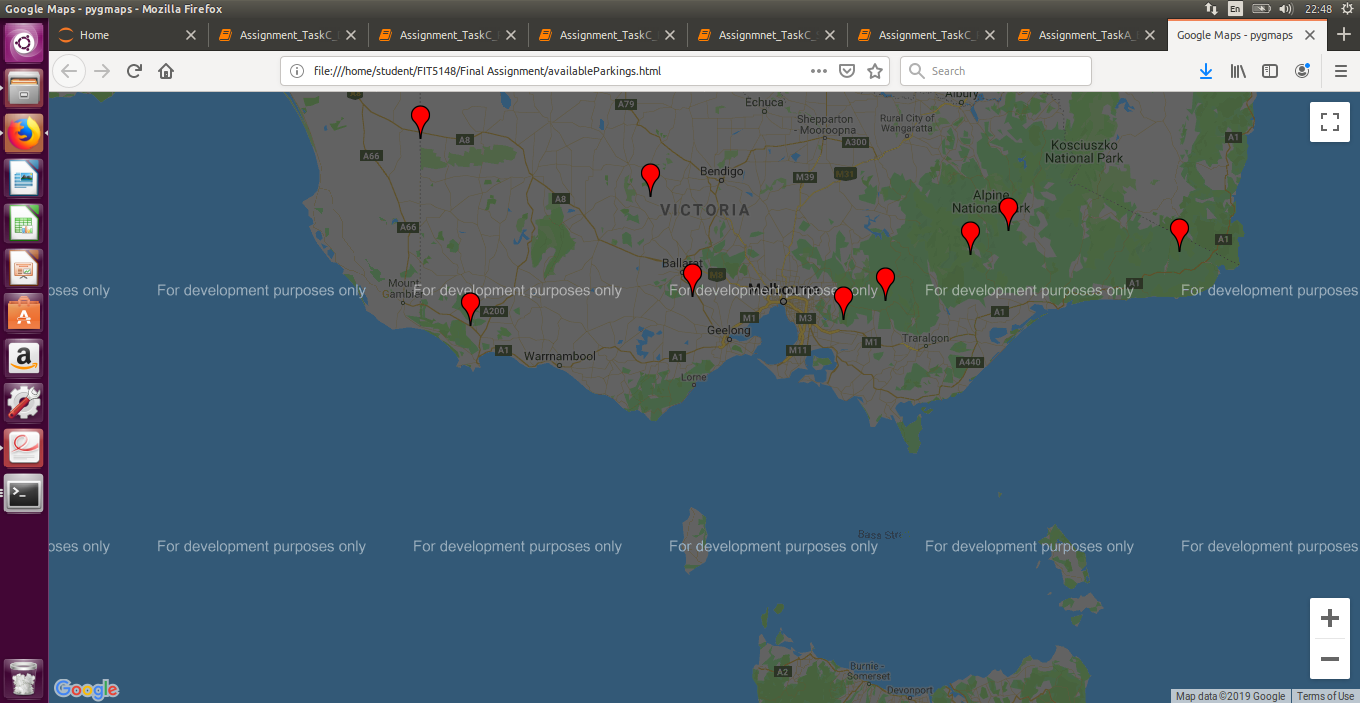